In [16]:
from mc import *
from matplotlib import pyplot as plt
import numpy as np
import time

n_particles=1e4
cell_size=2
cubic_size=25
box_size=5
r=1
m=1e-26
T=300
n_steps=1000
dt=1e-9

time_start = time.time()
cubic = Cubic(n_particles=n_particles, cell_len=cell_size, cubic_size=cubic_size, box_size=box_size, r=r, m=m, T=T)

cubic.run(n_steps=n_steps, dt=dt)

nσ^3 = 0.64


10000 particles:   0%|          | 0/1000 [00:00<?, ?it/s]

T = 302.441875 K: 100%|██████████| 1000/1000 [08:35<00:00,  1.94it/s]


Text(0, 0.5, 'Kinetic Pressure Tensor diagonal')

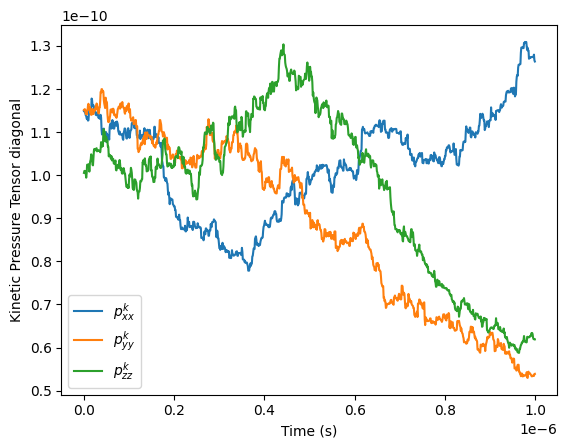

In [17]:
pk_xx, pk_yy, pk_zz = [], [], []
for pk in cubic.pks:
    pk_xx.append(np.mean(pk[:,0,0]))
    pk_yy.append(np.mean(pk[:,1,1]))
    pk_zz.append(np.mean(pk[:,2,2]))
plt.plot(cubic.ts, pk_xx)
plt.plot(cubic.ts, pk_yy)
plt.plot(cubic.ts, pk_zz)
plt.legend(['$p^k_{xx}$', '$p^k_{yy}$', '$p^k_{zz}$'])
plt.xlabel('Time (s)')
plt.ylabel('Kinetic Pressure Tensor diagonal')

Text(0, 0.5, 'Velocity')

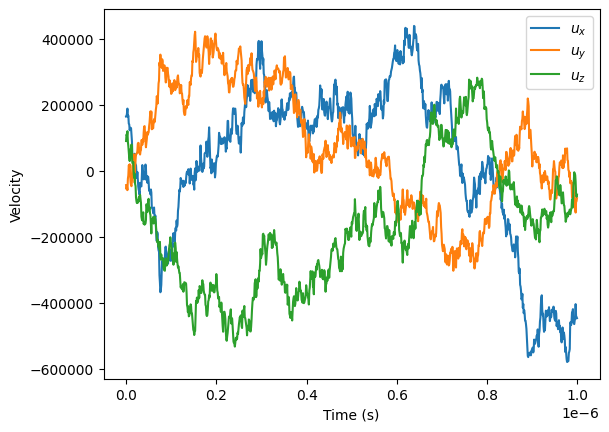

In [18]:
u_x, u_y, u_z = [], [], []
for u in cubic.us:
    u_x.append(np.mean(u[:,0]))
    u_y.append(np.mean(u[:,1]))
    u_z.append(np.mean(u[:,2]))
plt.plot(cubic.ts, u_x)
plt.plot(cubic.ts, u_y)
plt.plot(cubic.ts, u_z)
plt.legend(['$u_x$', '$u_y$', '$u_z$'])
plt.xlabel('Time (s)')
plt.ylabel('Velocity')

Text(0, 0.5, 'Kinetic Heat Flux')

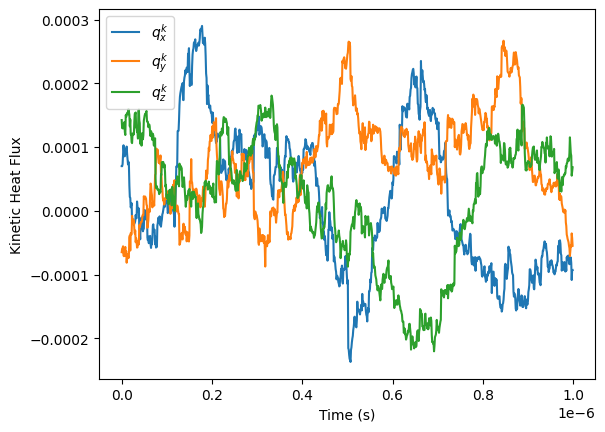

In [19]:
qk_x, qk_y, qk_z = [], [], []
for q in cubic.qks:
    qk_x.append(np.mean(q[:,0]))
    qk_y.append(np.mean(q[:,1]))
    qk_z.append(np.mean(q[:,2]))
plt.plot(cubic.ts, qk_x)
plt.plot(cubic.ts, qk_y)
plt.plot(cubic.ts, qk_z)
plt.legend(['$q^k_x$', '$q^k_y$', '$q^k_z$'])
plt.xlabel('Time (s)')
plt.ylabel('Kinetic Heat Flux')

Text(0, 0.5, 'Temperature (K)')

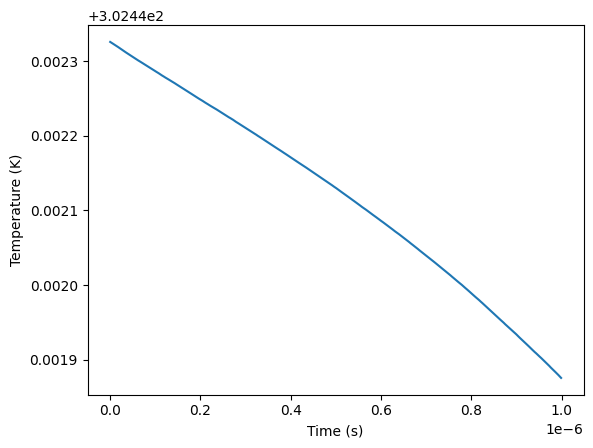

In [20]:
plt.plot(cubic.ts, cubic.Ts)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')

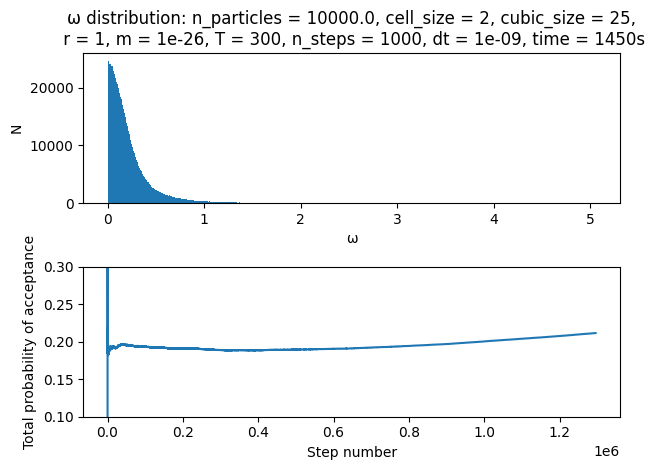

In [40]:
fig, axs = plt.subplots(2)
counts, bins, patches = axs[0].hist(cubic.ωs, bins=1000)
axs[0].set_xlabel('ω')
axs[0].set_ylabel('N')
axs[0].set_title('ω distribution: n_particles = {}, cell_size = {}, cubic_size = {},\n r = {}, m = {}, T = {}, n_steps = {}, dt = {}, time = {}s'.format(n_particles, cell_size, cubic_size, r, m, T, n_steps, dt, round(time.time() - time_start)))

# Store the mean probabilities at each step
mean_probs = []

total_trials = 0
accepted_trials = 0

for ω in cubic.ωs:
    # Generate a random number
    rand_num = np.random.random()

    # If the random number is less than ω, increment the number of accepted trials
    if rand_num < ω:
        accepted_trials += 1

    # Increment the total number of trials
    total_trials += 1

    # Calculate the mean probability of acceptance and store it
    mean_prob = accepted_trials / total_trials
    mean_probs.append(mean_prob)

# Plot the mean probabilities
axs[1].plot(mean_probs)
axs[1].set_xlabel('Step number')
axs[1].set_ylabel('Total probability of acceptance')
axs[1].set_ylim(0.1, 0.3)

# Adjust the space between the subplots
plt.tight_layout()

Text(0, 0.5, 'Mean probability of acceptance')

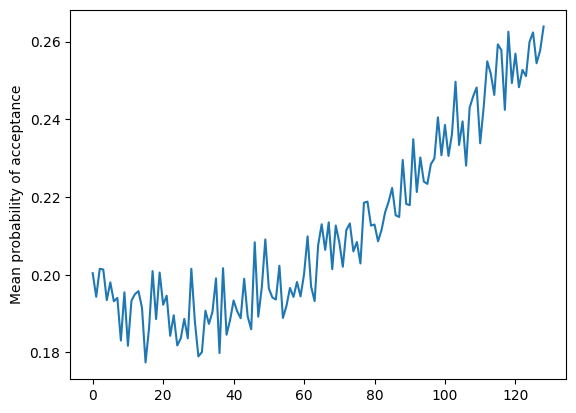

In [41]:
# acceptance per 5000
total_trials = 0
accepted_trials = 0
n_bin = 10000
mean_probs = []
mean_means = []
for ω in cubic.ωs:
    if np.random.random() < ω:
        accepted_trials += 1
    total_trials += 1
    mean_prob = accepted_trials / total_trials
    mean_probs.append(mean_prob)
    
    if total_trials == n_bin:
        mean_means.append(np.mean(mean_probs))
        total_trials = accepted_trials = 0
        mean_probs = []

plt.plot(mean_means)
plt.ylabel('Mean probability of acceptance')

In [54]:
qk_normed = cubic.qk / np.linalg.norm(cubic.qk, axis=3, keepdims=True)
qk = cubic.qk

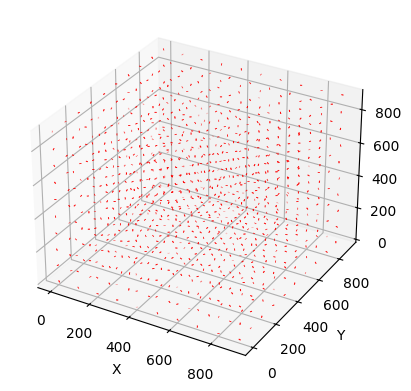

In [66]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.zeros((cubic.cubic_box_size, cubic.cubic_box_size, cubic.cubic_box_size))
y = np.zeros((cubic.cubic_box_size, cubic.cubic_box_size, cubic.cubic_box_size))
z = np.zeros((cubic.cubic_box_size, cubic.cubic_box_size, cubic.cubic_box_size))

for i in range(cubic.cubic_box_size):
    for j in range(cubic.cubic_box_size):
        for k in range(cubic.cubic_box_size):
            x[i, j, k] = cubic.cubic_len * i
            y[i, j, k] = cubic.cubic_len * j
            z[i, j, k] = cubic.cubic_len * k

x = x.flatten()
y = y.flatten()
z = z.flatten()
# u = qk_normed[:, :, :, 0].flatten()
# v = qk_normed[:, :, :, 1].flatten()
# w = qk_normed[:, :, :, 2].flatten()
u = qk[:, :, :, 0].flatten()
v = qk[:, :, :, 1].flatten()
w = qk[:, :, :, 2].flatten()

ax.quiver(x, y, z, u, v, w, length=4, normalize=True, color='red')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# plt.savefig('quiver.pdf')
